## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results)
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
unique_mice_count = len(merged_data['Mouse ID'].unique())
print(f'{unique_mice_count} unique mice.')

249 unique mice.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.set_index(['Mouse ID', 'Timepoint'])
duplicate_mice

Drug Regimen   Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
k403     0             Ramicane  Male          21          16   
         5             Ramicane  Male          21          16   
         10            Ramicane  Male          21          16   
         15            Ramicane  Male          21          16   
         20            Ramicane  Male          21          16   
...                         ...   ...         ...         ...   
z969     25            Naftisol  Male           9          30   
         30            Naftisol  Male           9          30   
         35            Naftisol  Male           9          30   
         40            Naftisol  Male           9          30   
         45            Naftisol  Male           9          30   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
k403     0                   45.000000                 0  
         5                   38.825898                 0  
         10                  35.014271                 1  
         15                  34.223992                 1  
         20                  32.997729                 1  
...                                ...               ...  
z969     25                  63.145652                 2  
         30                  65.841013                 3  
         35                  69.176246                 4  
         40                  70.314904                 4  
         45                  73.867845                 4  

[1893 rows x 6 columns]

In [4]:
# Optional: Get all the data for the duplicate mouse ID.  
duplicates = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_data.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = 'first', inplace = True)
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_unique_mice_count = len(merged_data['Mouse ID'].unique())

print(f'{cleaned_unique_mice_count} unique mice.')

249 unique mice.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_data = merged_data.groupby('Drug Regimen')
regimen_list = [regimen[0] for regimen in regimen_data['Drug Regimen'].unique()]

#mean
regimen_tumor_mean = [regimen_data.get_group(regimen)['Tumor Volume (mm3)'].mean() for regimen in regimen_list]

#median
regimen_tumor_median = [regimen_data.get_group(regimen)['Tumor Volume (mm3)'].median() for regimen in regimen_list]

#stdev
regimen_tumor_stdev = [regimen_data.get_group(regimen)['Tumor Volume (mm3)'].std() for regimen in regimen_list]

#sem
regimen_tumor_sem = [regimen_data.get_group(regimen)['Tumor Volume (mm3)'].sem() for regimen in regimen_list]

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = pd.DataFrame({"Drug Regimen": regimen_list,
                             "Tumor Volume Mean": regimen_tumor_mean,
                             "Tumor Volume Median": regimen_tumor_median,
                             "Tumor Volume Standard Deviation": regimen_tumor_stdev,
                             "Tumor Volume SEM": regimen_tumor_sem}).set_index('Drug Regimen')
summary_table

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.393463,50.909965,6.568014,0.525862
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar Plots

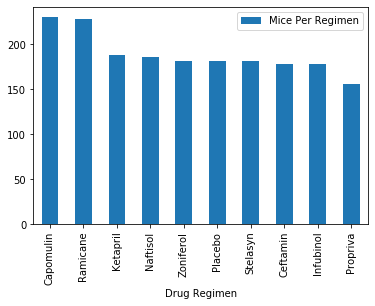

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

mice_per_treatment = [len(regimen_data.get_group(regimen)) for regimen in regimen_list]
regimen_df = pd.DataFrame({'Drug Regimen': regimen_list,
                          'Mice Per Regimen': mice_per_treatment}).sort_values('Mice Per Regimen',ascending = False)
regimen_df.plot(x = 'Drug Regimen', y = 'Mice Per Regimen', kind = 'bar')

Text(0.5, 0, 'Drug Regimen')

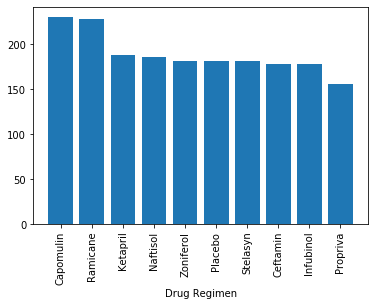

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#SORTING THE BAR CHART
sorted_regimen_list = ['Capomulin', 'Ramicane', 'Ketapril','Naftisol','Zoniferol', 'Placebo','Stelasyn','Ceftamin','Infubinol','Propriva']
sorted_mice_count = [230, 228, 188, 186, 182, 181, 181, 178, 178, 156]
plt.bar(sorted_regimen_list, sorted_mice_count)
plt.xticks(rotation=90) 
plt.xlabel("Drug Regimen")

## Pie Plots

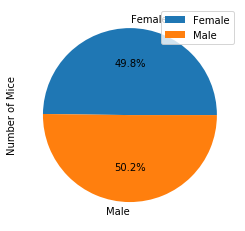

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_list = ['Female', 'Male']
#generate the df
gender_df = merged_data.groupby('Sex')
sex_count = [len(group) for group in gender_df['Mouse ID'].unique()]

#dataframe plot
gender_count_df = pd.DataFrame({'Gender': sex_list,
                               'Number of Mice': sex_count}).set_index('Gender')
gender_count_df.plot.pie(y = 'Number of Mice', autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x248b1774ac8>,
 [Text(0.006939175976765795, 1.0999781124353174, 'Female'),
  Text(-0.006939175976765929, -1.0999781124353174, 'Male')],
 [Text(0.0037850050782358875, 0.5999880613283548, '49.8%'),
  Text(-0.003785005078235961, -0.5999880613283548, '50.2%')])

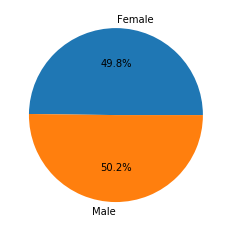

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = [len(group) for group in gender_df['Mouse ID'].unique()]
plt.pie(sex_count, labels = sex_list, autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#merged_data Capomulin, Ramicane, Infubinol, and Ceftamin
#tumor_volume_test = merged_data.set_index('Mouse ID', 'Drug Regimen'])
final_timepoints = merged_data.loc[merged_data['Timepoint'] == 45]
capomulin_df = final_timepoints.loc[final_timepoints['Drug Regimen'] == 'Capomulin']
ramicane_df = final_timepoints.loc[final_timepoints['Drug Regimen'] == 'Ramicane']
infubinol_df = final_timepoints.loc[final_timepoints['Drug Regimen'] == 'Infubinol']
ceftamin_df = final_timepoints.loc[final_timepoints['Drug Regimen'] == 'Ceftamin']

#Capomulin
capomulin_mice = capomulin_df.set_index('Mouse ID')
capomulin_finaltumors = capomulin_mice['Tumor Volume (mm3)'] #use .values to get a list of the volumes
capomulin_quartiles = capomulin_finaltumors.quantile([.25, .50, .75])
capomulin_lower, capomulin_upper = capomulin_quartiles[.25], capomulin_quartiles[.75]
capomulin_iqr = st.iqr(capomulin_finaltumors) #capomulin_upper - capomulin_lower
capomulin_lowerbound, capomulin_upperbound = capomulin_lower - 1.5*capomulin_iqr, capomulin_upper + 1.5*capomulin_iqr
print(f'Capomulin Final Tumor Values lower than {round(capomulin_lowerbound, 2)} or higher than {round(capomulin_upperbound, 2)} are outliers. IQR is {round(capomulin_iqr, 2)}.')

#Ramicane
ramicane_mice = ramicane_df.set_index('Mouse ID')
ramicane_finaltumors = ramicane_mice['Tumor Volume (mm3)']
ramicane_quartiles = ramicane_finaltumors.quantile([.25, .50, .75])
ramicane_lower, ramicane_upper = ramicane_quartiles[.25], ramicane_quartiles[.75]
ramicane_iqr = st.iqr(ramicane_finaltumors)
ramicane_lowerbound, ramicane_upperbound = ramicane_lower - 1.5*ramicane_iqr, ramicane_upper + 1.5*ramicane_iqr
print(f'Ramicane Final Tumor Values lower than {round(ramicane_lowerbound, 2)} or higher than {round(ramicane_upperbound, 2)} are outliers. IQR is {round(ramicane_iqr,2)}')

#Infubinol
infubinol_mice = infubinol_df.set_index('Mouse ID')
infubinol_finaltumors = infubinol_mice['Tumor Volume (mm3)']
infubinol_quartiles = infubinol_finaltumors.quantile([.25, .50, .75])
infubinol_lower, infubinol_upper = infubinol_quartiles[.25], infubinol_quartiles[.75]
infubinol_iqr = st.iqr(infubinol_finaltumors)
infubinol_lowerbound, infubinol_upperbound = infubinol_lower - 1.5*infubinol_iqr, infubinol_upper + 1.5*infubinol_iqr
print(f'Infubinol Final Tumor Values lower than {round(infubinol_lowerbound, 2)} or higher than {round(infubinol_upperbound, 2)} are outliers. IQR is {round(infubinol_iqr, 2)}')

#Ceftamin
ceftamin_mice = ceftamin_df.set_index('Mouse ID')
ceftamin_finaltumors = ceftamin_mice['Tumor Volume (mm3)']
ceftamin_quartiles = ceftamin_finaltumors.quantile([.25, .50, .75])
ceftamin_lower, ceftamin_upper = ceftamin_quartiles[.25], ceftamin_quartiles[.75]
ceftamin_iqr = st.iqr(ceftamin_finaltumors)
ceftamin_lowerbound, ceftamin_upperbound = ceftamin_lower - 1.5*ceftamin_iqr, ceftamin_upper + 1.5*ceftamin_iqr
print(f'Ceftamin Final Tumor Values lower than {round(ceftamin_lowerbound, 2)} or higher than {round(ceftamin_upperbound, 2)} are outliers. IQR is {round(ceftamin_iqr, 2)}')


Capomulin Final Tumor Values lower than 20.7 or higher than 51.83 are outliers. IQR is 7.78.
Ramicane Final Tumor Values lower than 19.69 or higher than 49.8 are outliers. IQR is 7.53
Infubinol Final Tumor Values lower than 55.36 or higher than 75.08 are outliers. IQR is 4.93
Ceftamin Final Tumor Values lower than 52.29 or higher than 76.67 are outliers. IQR is 6.09


Text(0, 0.5, 'Tumor Volume in mm3')

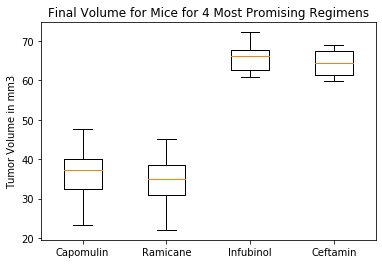

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#fig1, ax1 = plt.subplots()
plt.boxplot([capomulin_finaltumors, ramicane_finaltumors, infubinol_finaltumors, ceftamin_finaltumors])
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.title("Final Volume for Mice for 4 Most Promising Regimens")
plt.ylabel("Tumor Volume in mm3")

## Line and Scatter Plots

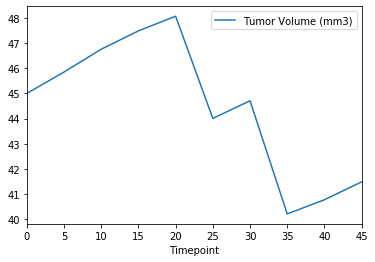

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse = merged_data.loc[((merged_data['Drug Regimen'] == 'Capomulin') & (merged_data['Mouse ID'] == 'l509'))]
capomulin_mouse_df = capomulin_mouse[['Timepoint', 'Tumor Volume (mm3)']].set_index('Timepoint')
capomulin_mouse_df.plot.line()


(Text(0.5, 0, 'Weight (g)'), Text(0, 0.5, 'Average Tumor Volume (mm3)'))

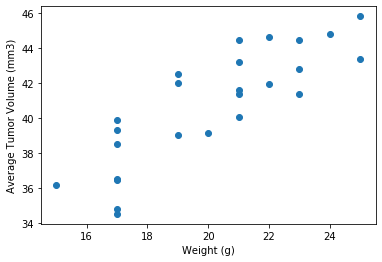

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_all = merged_data.loc[merged_data['Drug Regimen'] == 'Capomulin']
capomulin_mouse = capomulin_all['Mouse ID'].unique()

#getting weights of each mice in a list
capomulin_weights = [capomulin_all.loc[capomulin_all['Mouse ID'] == mice]['Weight (g)'].unique()[0] for mice in capomulin_mouse]

#getting average tumor volume for each mice
capomulin_average_volumes = [(capomulin_all.loc[capomulin_all['Mouse ID'] == mice]['Tumor Volume (mm3)'].mean()) for mice in capomulin_mouse]
plt.scatter(capomulin_weights, capomulin_average_volumes)  #scatter with lists
plt.xlabel("Weight (g)") , plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

(Text(0.5, 0, 'Weight (g)'), Text(0, 0.5, 'Average Tumor Volume (mm3)'))

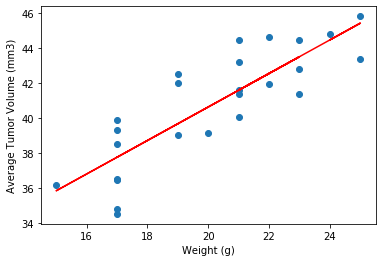

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capo_reg_df = pd.DataFrame({'Mouse ID': capomulin_mouse,
                            'Weight (g)': capomulin_weights, 'Average Tumor Volume': capomulin_average_volumes})
capomulin_correlation = round(st.pearsonr(capomulin_weights, capomulin_average_volumes)[0], 2)
capo_reg_x = capo_reg_df['Weight (g)']
capo_reg_y = capo_reg_df['Average Tumor Volume'] #make DF to use series with linregress, lists dont work with floats
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capo_reg_x, capo_reg_y)
capo_regress = capo_reg_x * slope + intercept
capo_line = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(capo_reg_x, capo_reg_y) #scatter with series
plt.plot(capo_reg_x, capo_regress, "r-")
plt.xlabel("Weight (g)") , plt.ylabel("Average Tumor Volume (mm3)")